In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
Load and Clean the Data
Now load the dataset, clean it by removing duplicates, and visualize the cleaned dataset. Here’s how you can call the preprocessing functions

In [43]:
# Load and clean the dataset
def load_and_clean_data(filepath):
    data = pd.read_csv(filepath)
    return data

# Load your datasets
data = load_and_clean_data(r'C:\Users\Yibabe\Desktop\kifiyaAIMweek-3\data\cleaned_insurance.csv')


In [45]:
print(data.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [46]:
selected_columns = [
    'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
    'cubiccapacity', 'kilowatts', 'bodytype', 'SumInsured',
    'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
    'CoverType', 'MaritalStatus', 'Gender', 'Country', 'Province'
]


In [48]:
data_filtered = data[selected_columns + ['TotalClaims']]
data_filtered.head()

,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,SumInsured,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,MaritalStatus,Gender,Country,Province,TotalClaims
0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,0.01,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Not specified,Not specified,South Africa,Gauteng,0.0
1,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,0.01,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Not specified,Not specified,South Africa,Gauteng,0.0
2,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,0.01,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Not specified,Not specified,South Africa,Gauteng,0.0
3,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,119300.00,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Not specified,Not specified,South Africa,Gauteng,0.0
4,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,119300.00,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Not specified,Not specified,South Africa,Gauteng,0.0


In [51]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    le = LabelEncoder()
    categorical_columns = ['VehicleType', 'make', 'Model', 'bodytype', 'ExcessSelected','CoverCategory', 'CoverType', 'Gender', 'Country', 'Province','MaritalStatus']
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

data_encoded = encode_features(data_filtered)


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_6712\2632205348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_6712\2632205348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col].astype(str))
C:\Users\Yibabe\AppData\Local\Temp\ipykernel_6712\2632205348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [52]:
data_encoded.head()

,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,SumInsured,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,MaritalStatus,Gender,Country,Province,TotalClaims
0,4,2004,21,88,6.0,2597.0,130.0,2,0.01,25.0000,10,19,14,1,2,0,2,0.0
1,4,2004,21,88,6.0,2597.0,130.0,2,0.01,25.0000,10,19,14,1,2,0,2,0.0
2,4,2004,21,88,6.0,2597.0,130.0,2,0.01,25.0000,10,19,14,1,2,0,2,0.0
3,4,2004,21,88,6.0,2597.0,130.0,2,119300.00,584.6468,1,8,5,1,2,0,2,0.0
4,4,2004,21,88,6.0,2597.0,130.0,2,119300.00,584.6468,1,8,5,1,2,0,2,0.0


In [53]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('TotalClaims', axis=1)
y = data_encoded['TotalClaims']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_encoded.drop('TotalClaims', axis=1)
y = data_encoded['TotalClaims']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
 Convert Non-Numeric Columns (Categorical Encoding):

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your loaded DataFrame

# Updated list of categorical columns for encoding
categorical_columns = ['VehicleType', 'make', 'Model', 'bodytype', 
                       'CoverCategory', 'CoverType', 'Gender', 
                       'Country', 'Province', 'Citizenship',
                       'TermFrequency', 'ExcessSelected']

# Apply One-Hot Encoding to only the columns present in the reduced set
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check if any columns are still object/string type (for any additional handling if needed)
string_columns = data_encoded.select_dtypes(include=['object']).columns

# Drop any remaining string/object type columns if there are any
data_encoded = data_encoded.drop(string_columns, axis=1, errors='ignore')

# View the first few rows of the encoded data
print(data_encoded.head())


   RegistrationYear  Cylinders  cubiccapacity  kilowatts  NumberOfDoors  \
0              2004        6.0         2597.0      130.0            4.0   
1              2004        6.0         2597.0      130.0            4.0   
2              2004        6.0         2597.0      130.0            4.0   
3              2004        6.0         2597.0      130.0            4.0   
4              2004        6.0         2597.0      130.0            4.0   

   CustomValueEstimate  SumInsured  CalculatedPremiumPerTerm  TotalPremium  \
0             119300.0        0.01                   25.0000     21.929825   
1             119300.0        0.01                   25.0000     21.929825   
2             119300.0        0.01                   25.0000      0.000000   
3             119300.0   119300.00                  584.6468    512.848070   
4             119300.0   119300.00                  584.6468      0.000000   

   TotalClaims  ...  ExcessSelected_Mobility - R250  \
0          0.0  ...      

In [14]:
# Define features (X) and target (y)
X = data_encoded.drop('TotalClaims', axis=1)
y = data_encoded['TotalClaims']

# Check the shape of the data
X.shape, y.shape


((220386, 292), (220386,))

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
X_scaled = scaler.fit_transform(X)

# Check the scaled data
X_scaled[:5]


array([[-1.93927296,  7.11789098,  0.28837145, ...,  3.24705543,
        -0.13425508, -1.94331236],
       [-1.93927296,  7.11789098,  0.28837145, ...,  3.24705543,
        -0.13425508, -1.94331236],
       [-1.93927296,  7.11789098,  0.28837145, ...,  3.24705543,
        -0.13425508, -1.94331236],
       [-1.93927296,  7.11789098,  0.28837145, ..., -0.30797134,
        -0.13425508, -1.94331236],
       [-1.93927296,  7.11789098,  0.28837145, ..., -0.30797134,
        -0.13425508, -1.94331236]])

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the train/test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((176308, 292), (44078, 292), (176308,), (44078,))

In [17]:


# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rfr_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rfr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate each model
lr_mae, lr_mse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
dt_mae, dt_mse, dt_r2 = evaluate_model(dt_model, X_test, y_test)
rfr_mae, rfr_mse, rfr_r2 = evaluate_model(rfr_model, X_test, y_test)
xgb_mae, xgb_mse, xgb_r2 = evaluate_model(xgb_model, X_test, y_test)

# Print results
print(f"Linear Regression - MAE: {lr_mae}, MSE: {lr_mse}, R2: {lr_r2}")
print(f"Decision Tree - MAE: {dt_mae}, MSE: {dt_mse}, R2: {dt_r2}")
print(f"Random Forest - MAE: {rfr_mae}, MSE: {rfr_mse}, R2: {rfr_r2}")
print(f"XGBoost - MAE: {xgb_mae}, MSE: {xgb_mse}, R2: {xgb_r2}")


Linear Regression - MAE: 228.3482444630488, MSE: 4099242.734431871, R2: -0.0022354531592547744
Decision Tree - MAE: 129.7335393876363, MSE: 5389245.350306432, R2: -0.3176318422137445
Random Forest - MAE: 134.24287970268134, MSE: 5161518.469246934, R2: -0.2619542528097003
XGBoost - MAE: 152.05630246498697, MSE: 5025931.764977786, R2: -0.22880427589953967


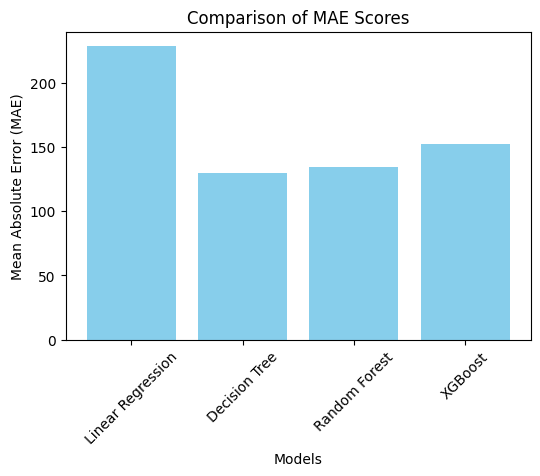

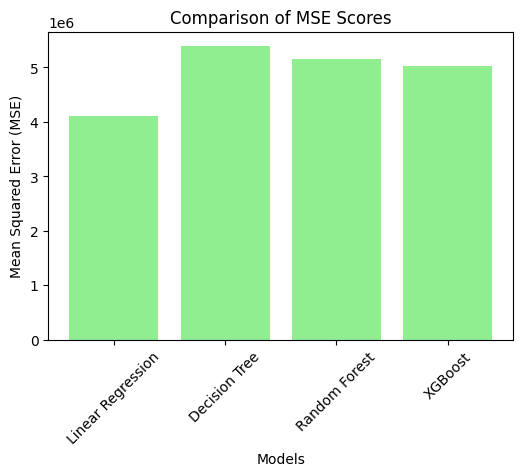

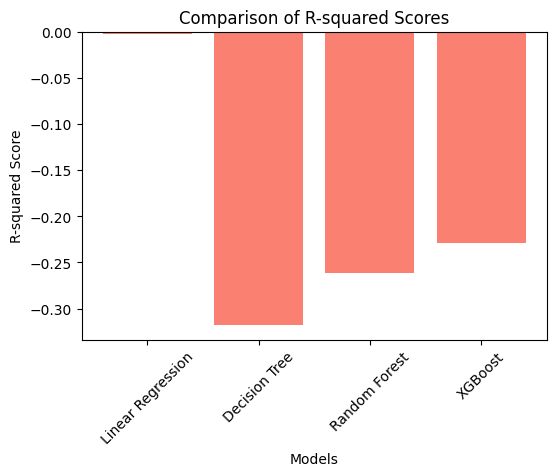

In [19]:
import matplotlib.pyplot as plt

# Model names and metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores = [lr_mae, dt_mae, rfr_mae, xgb_mae]
mse_scores = [lr_mse, dt_mse, rfr_mse, xgb_mse]
r2_scores = [lr_r2, dt_r2, rfr_r2, xgb_r2]

# Plot MAE scores
plt.figure(figsize=(6, 4))
plt.bar(models, mae_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot MSE scores
plt.figure(figsize=(6, 4))
plt.bar(models, mse_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot R2 scores
plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color='salmon')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.show()
